In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols


import warnings
warnings.filterwarnings('ignore')

In [189]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# 1. Import Cleaned Data

In [190]:
data = pd.read_csv('csv_files/cleaned_data.csv',index_col=0)
dummy_data = pd.read_csv('csv_files/dummy_data.csv',index_col=0)
final_data = pd.concat([data,dummy_data],axis=1)

In [191]:
data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 538000.00000         3    2.25000         2570      7242 2.00000   
1 571000.00000         4    2.00000         2750      7807 1.50000   
2 315000.00000         3    1.00000          960      6634 1.00000   
3 382500.00000         2    1.00000         1190      4440 1.00000   
4 425000.00000         3    1.75000         2500      6840 1.00000   

   sqft_above      lat       long  sqft_living15  sqft_lot15  total_sqft  \
0        2170 47.72100 -122.31900           1690        7639        9812   
1        2250 47.71680 -122.28700           1510        7807       10557   
2         960 47.72640 -122.31000           1570        7203        7594   
3        1190 47.71350 -122.28700           1060        5715        5630   
4        1300 47.72220 -122.32000           1580        8691        9340   

   total_sqft_inside  age_when_sold  
0         2570.00000             63  
1         2750.00000             98  
2          960.00000             62  
3         1190.00000             33  
4         2500.00000             57

In [192]:
dummy_data.head()

waterfront_1  view_1  view_2  view_3  view_4  condition_2  condition_3  \
0             0       0       0       0       0            0            1   
1             0       0       0       0       0            0            0   
2             0       0       0       0       0            0            1   
3             0       0       0       0       0            0            1   
4             0       0       0       0       0            0            1   

   condition_4  condition_5  quarter_sold_2  quarter_sold_3  quarter_sold_4  \
0            0            0               0               0               1   
1            0            1               1               0               0   
2            0            0               1               0               0   
3            0            0               0               1               0   
4            0            0               0               1               0   

   decade_built_1910  decade_built_1920  decade_built_1930  decade_built_1940  \
0                  0                  0                  0                  0   
1                  1                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   decade_built_1950  decade_built_1960  decade_built_1970  decade_built_1980  \
0                  1                  0                  0                  0   
1                  0                  0                  0                  0   
2                  1                  0                  0                  0   
3                  0                  0                  0                  1   
4                  1                  0                  0                  0   

   decade_built_1990  decade_built_2000  decade_built_2010  grade_binned_Fair  \
0                  0                  0                  0                  1   
1                  0                  0                  0                  1   
2                  0                  0                  0                  1   
3                  0                  0                  0                  1   
4                  0                  0                  0                  1   

   grade_binned_Good  grade_binned_High  renovated_1  basement_1  \
0                  0                  0            1           1   
1                  0                  0            0           1   
2                  0                  0            0           0   
3                  0                  0            0           0   
4                  0                  0            0           1   

   city_Bellevue  city_BlackDiamond  city_Bothell  city_Carnation  \
0              0                  0             0               0   
1              0                  0             0               0   
2              0                  0             0               0   
3              0                  0             0               0   
4              0                  0             0               0   

   city_Duvall  city_Enumclaw  city_FallCity  city_FederalWay  city_Issaquah  \
0            0              0              0                0              0   
1            0              0              0                0              0   
2            0              0              0                0              0   
3            0              0              0                0              0   
4            0              0              0                0              0   

   city_Kenmore  city_Kent  city_Kirkland  city_MapleValley  city_Medina  \
0             0          0              0                 0            0   
1             0          0              0                 0            0   
2             0          0              0                 0            

In [193]:
pd.set_option('display.max_columns', 100)
final_data.head()

price  bedrooms  bathrooms  sqft_living   sqft_lot  floors  \
0 538000.00000   3.00000    2.25000   2570.00000 7242.00000 2.00000   
1 571000.00000   4.00000    2.00000   2750.00000 7807.00000 1.50000   
2 315000.00000   3.00000    1.00000    960.00000 6634.00000 1.00000   
3 382500.00000   2.00000    1.00000   1190.00000 4440.00000 1.00000   
4 425000.00000   3.00000    1.75000   2500.00000 6840.00000 1.00000   

   sqft_above      lat       long  sqft_living15  sqft_lot15  total_sqft  \
0  2170.00000 47.72100 -122.31900     1690.00000  7639.00000  9812.00000   
1  2250.00000 47.71680 -122.28700     1510.00000  7807.00000 10557.00000   
2   960.00000 47.72640 -122.31000     1570.00000  7203.00000  7594.00000   
3  1190.00000 47.71350 -122.28700     1060.00000  5715.00000  5630.00000   
4  1300.00000 47.72220 -122.32000     1580.00000  8691.00000  9340.00000   

   total_sqft_inside  age_when_sold  waterfront_1  view_1  view_2  view_3  \
0         2570.00000       63.00000             0       0       0       0   
1         2750.00000       98.00000             0       0       0       0   
2          960.00000       62.00000             0       0       0       0   
3         1190.00000       33.00000             0       0       0       0   
4         2500.00000       57.00000             0       0       0       0   

   view_4  condition_2  condition_3  condition_4  condition_5  quarter_sold_2  \
0       0            0            1            0            0               0   
1       0            0            0            0            1               1   
2       0            0            1            0            0               1   
3       0            0            1            0            0               0   
4       0            0            1            0            0               0   

   quarter_sold_3  quarter_sold_4  decade_built_1910  decade_built_1920  \
0               0               1                  0                  0   
1               0               0                  1                  0   
2               0               0                  0                  0   
3               1               0                  0                  0   
4               1               0                  0                  0   

   decade_built_1930  decade_built_1940  decade_built_1950  decade_built_1960  \
0                  0                  0                  1                  0   
1                  0                  0                  0                  0   
2                  0                  0                  1                  0   
3                  0                  0                  0                  0   
4                  0                  0                  1                  0   

   decade_built_1970  decade_built_1980  decade_built_1990  decade_built_2000  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  1                  0                  0   
4                  0                  0                  0                  0   

   decade_built_2010  grade_binned_Fair  grade_binned_Good  grade_binned_High  \
0                  0                  1                  0                  0   
1                  0                  1                  0                  0   
2                  0                  1                  0                  0   
3                  0                  1                  0                  0   
4                  0                  1                  0                  0   

   renovated_1  basement_1  city_Bellevue  city_BlackDiamond  city_Bothell  \
0            1           1              0                  0             0   
1            0           1              0                  0             0   
2            0           0   

In [194]:
# continuous = ['sqft_living','sqft_lot','sqft_above','lat','long','sqft_living15','sqft_lot15',
#              'total_sqft','total_sqft_inside','age_when_sold']
# discrete = ['bedrooms','bathroom','floors']

# 2. Baseline Model

https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa

* Starting with a simple model as a baseline consistently led to a better end product.
* Fundamentally, a baseline is a model that is both simple to set up and has a reasonable chance of providing decent results. Experimenting with them is usually quick and low cost, since implementations are widely available in popular packages.

In our case, we created a baseline model that was simple to set up in which we data cleaned and created dummy variables for our categorical variables.

In [195]:
# outcome is target
outcome = 'price'
# x_cols are the predictors
x_cols = list(final_data.drop(['price'],axis=1).columns)

In [196]:
# testing regression model with current train data
pred_sum = '+'.join(x_cols)
formula = outcome + '~' + pred_sum

model_1_results = ols(formula=formula, data=final_data).fit()
model_1_results.summary()

## Interpretation

* R-squared is ~0.763, showing that our data is closely fitted to our regression line
* F-statistic p-value is 0.00, probability that our sample would represent the population, holds true
* There are a lot of p-values > 0.05 for our coefficients, indicating there is no statistically significant relationship between the coefficient and predictor.
* Skewness is not 0 (normal) and is higher than 1, meaning the data is highly skewed
* Kurtosis is not 3 (normal) and is higher than 3, meaning the tails are heavy

# 3. Linear Assumption - Linearity between Features and Price

The linearity assumptions requires that there is a linear relationship between the response variable (Y) and predictor (X). Linear means that the change in Y by 1-unit change in X, is constant.

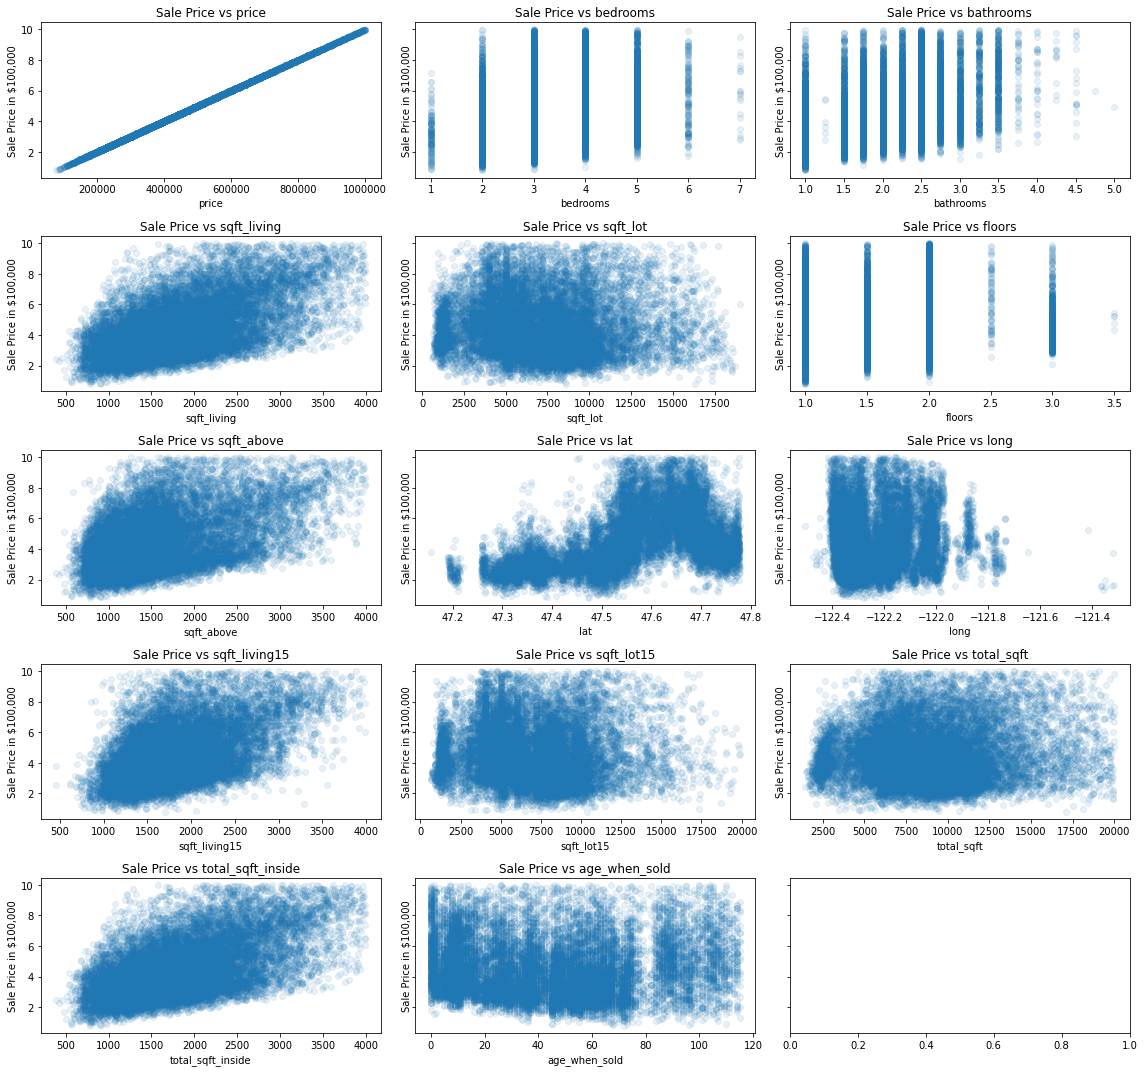

In [197]:
# plotting linearity between feature and price
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), data.columns):
    ax.scatter(data[column], data['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')
    ax.ticklabel_format(useOffset=False, style='plain')
plt.savefig('images/final_model_linearity.png')
fig.tight_layout()

The feature, age_when_sold, clearly has no linear relationship with the price therefore I will drop this feature.

In [198]:
# data.drop(['age_when_sold'],axis=1,inplace=True)

In [199]:
model_1_data = data
model_1_data.describe()

price    bedrooms   bathrooms  sqft_living    sqft_lot  \
count  15491.00000 15491.00000 15491.00000  15491.00000 15491.00000   
mean  456261.41146     3.29346     2.00841   1872.55019  7098.87477   
std   189085.63445     0.85509     0.67704    675.52541  3365.51966   
min    78000.00000     1.00000     1.00000    390.00000   520.00000   
25%   308000.00000     3.00000     1.50000   1360.00000  4800.00000   
50%   424950.00000     3.00000     2.00000   1790.00000  7100.00000   
75%   575000.00000     4.00000     2.50000   2300.00000  9085.00000   
max   999999.00000     7.00000     5.00000   3990.00000 19000.00000   

           floors  sqft_above         lat        long  sqft_living15  \
count 15491.00000 15491.00000 15491.00000 15491.00000    15491.00000   
mean      1.47127  1621.03286    47.55947  -122.22806     1841.19799   
std       0.54371   648.16460     0.13904     0.13308      550.84171   
min       1.00000   390.00000    47.15590  -122.50300      460.00000   
25%       1.00000  1140.00000    47.47120  -122.33700     1440.00000   
50%       1.00000  1460.00000    47.56900  -122.26700     1740.00000   
75%       2.00000  1960.00000    47.68050  -122.15000     2160.00000   
max       3.50000  3990.00000    47.77760  -121.31500     3990.00000   

       sqft_lot15  total_sqft  total_sqft_inside  age_when_sold  
count 15491.00000 15491.00000        15491.00000    15491.00000  
mean   7007.78187  8971.42496         1867.25331       44.13866  
std    3086.77077  3564.08720          676.07728       29.87149  
min     651.00000  1452.00000          390.00000        0.00000  
25%    4900.00000  6523.50000         1350.00000       17.00000  
50%    7200.00000  8880.00000         1780.00000       42.00000  
75%    8800.00000 11045.00000         2300.00000       64.00000  
max   19884.00000 19988.00000         3990.00000      115.00000

# 6. Simple Regression for each Predictor Variable (Processed)

* The **Y and Fitted vs. X graph** plots the dependent variable against our predicted values with a confidence interval. The positive relationship shows that height and weight are correlated, i.e., when one variable increases the other increases.

* The **Residuals versus height graph** shows our model's errors versus the specified predictor variable. Each dot is an observed value; the line represents the mean of those observed values. Since there's no pattern in the distance between the dots and the mean value, the OLS assumption of homoskedasticity holds.

* The **Partial regression plot** shows the relationship between height and weight, taking in to account the impact of adding other independent variables on our existing height coefficient. You'll later learn how this same graph changes when you add more variables.

* The **Component and Component Plus Residual (CCPR) plot** is an extension of the partial regression plot. It shows where the trend line would lie after adding the impact of adding our other independent variables on the weight.

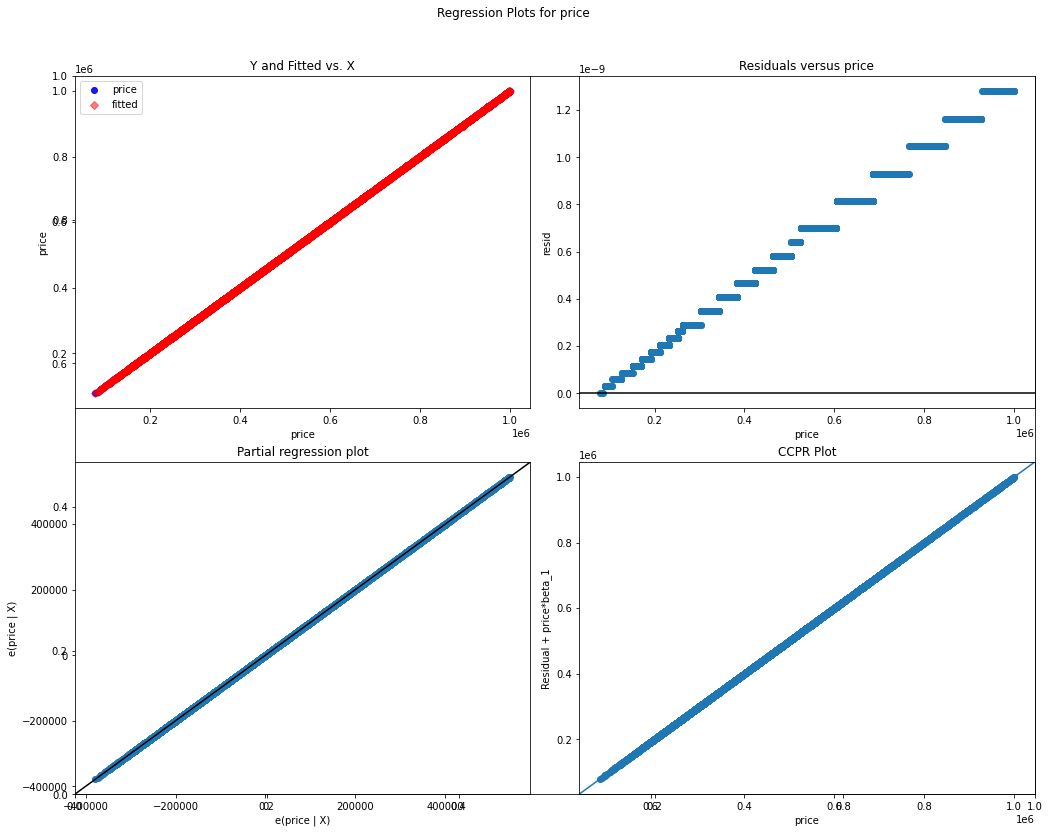

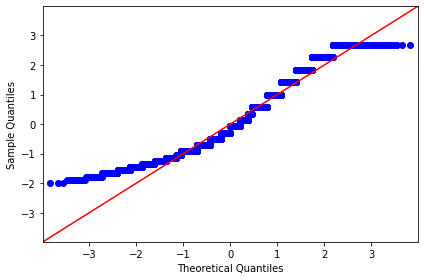

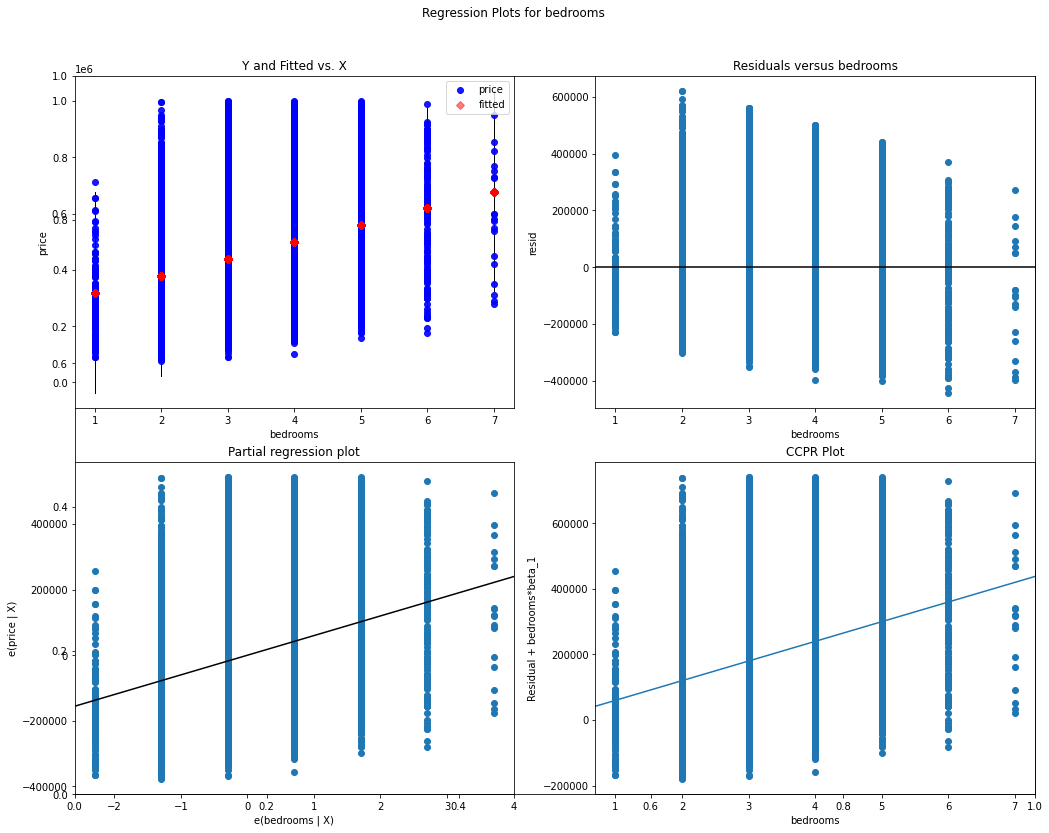

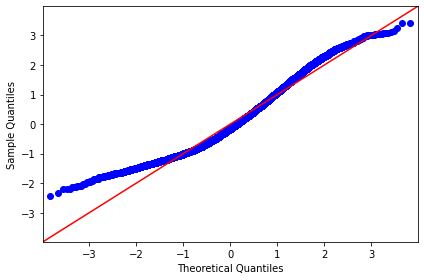

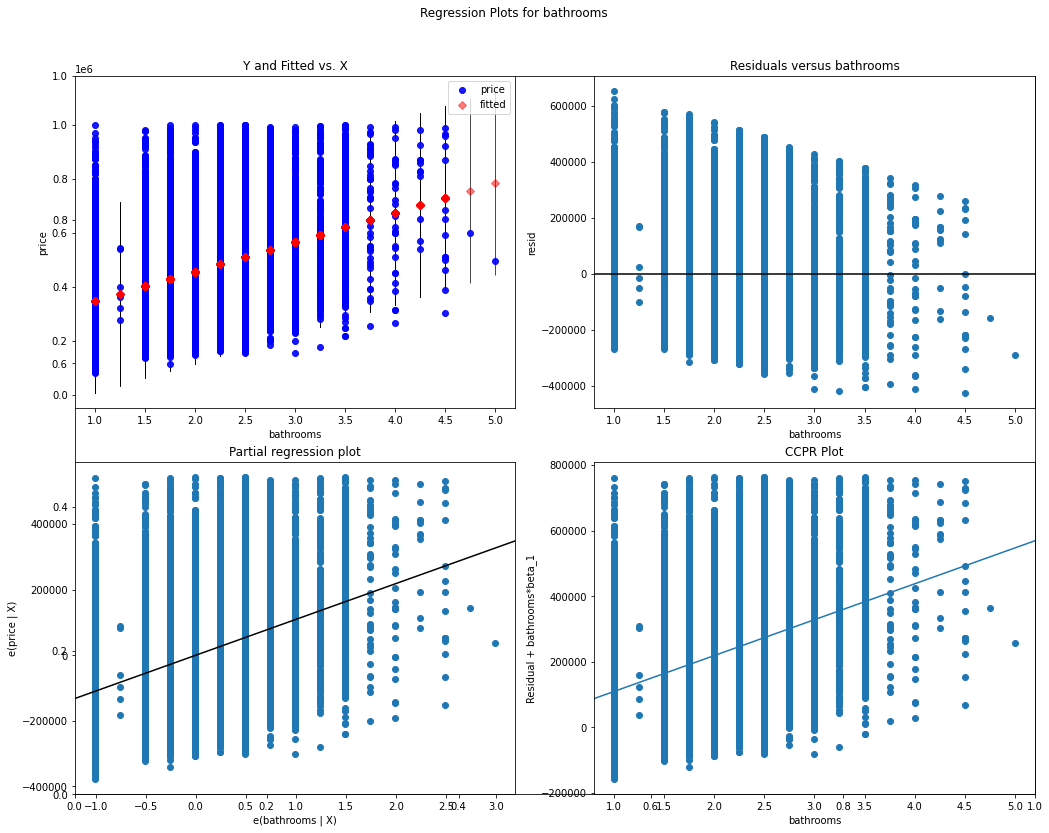

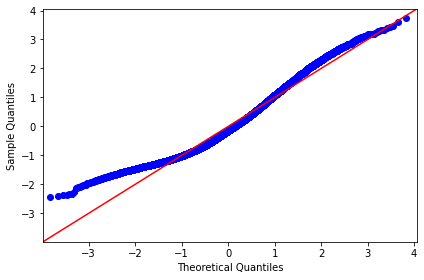

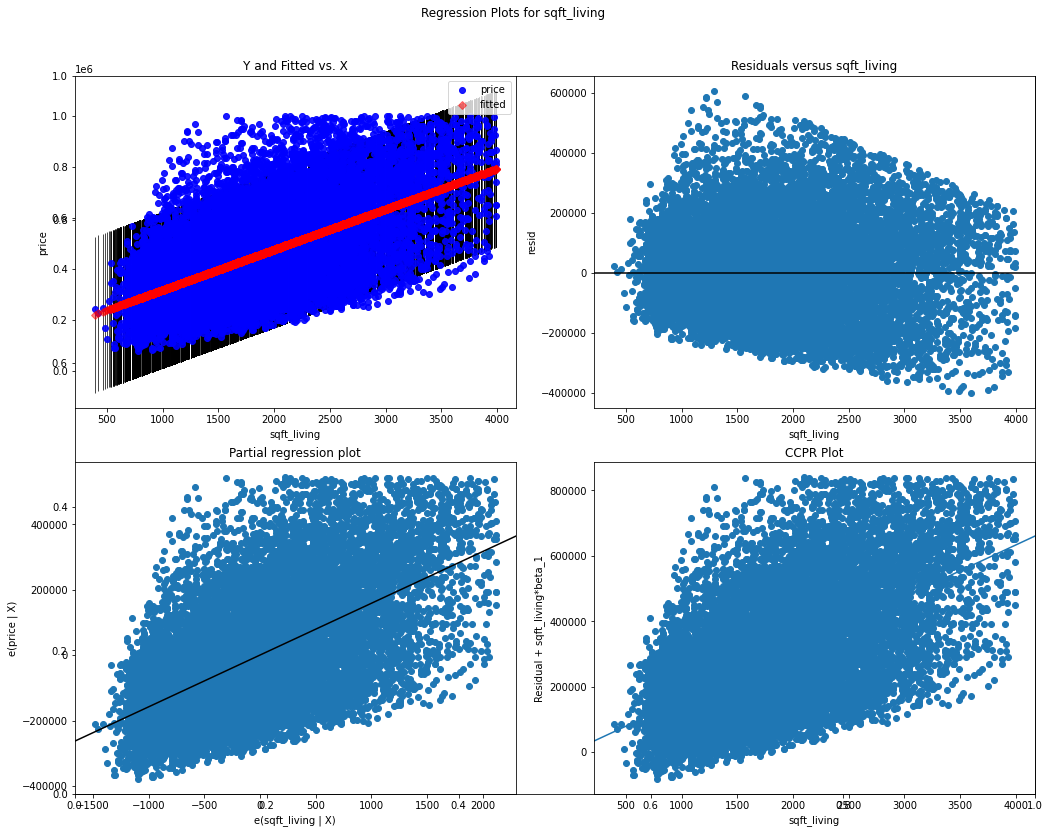

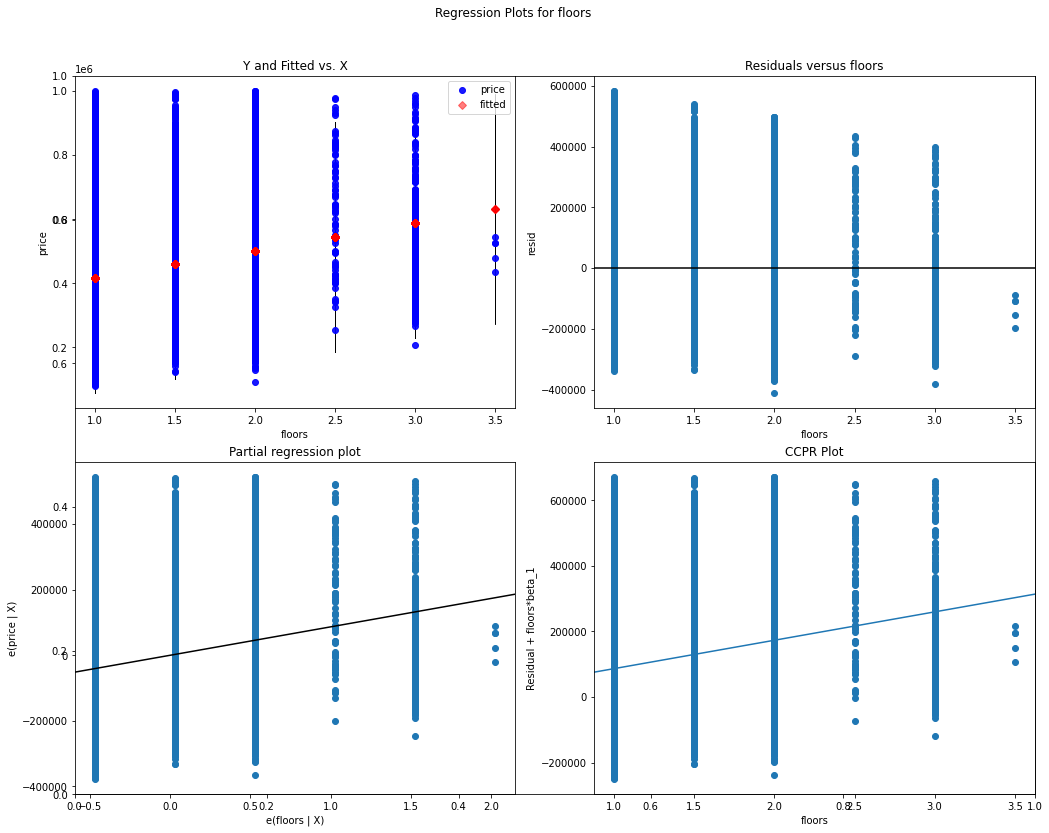

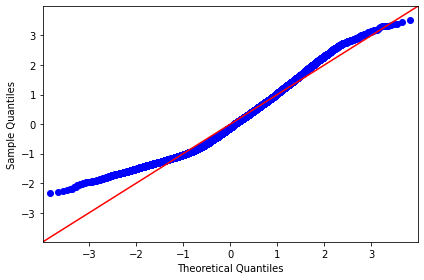

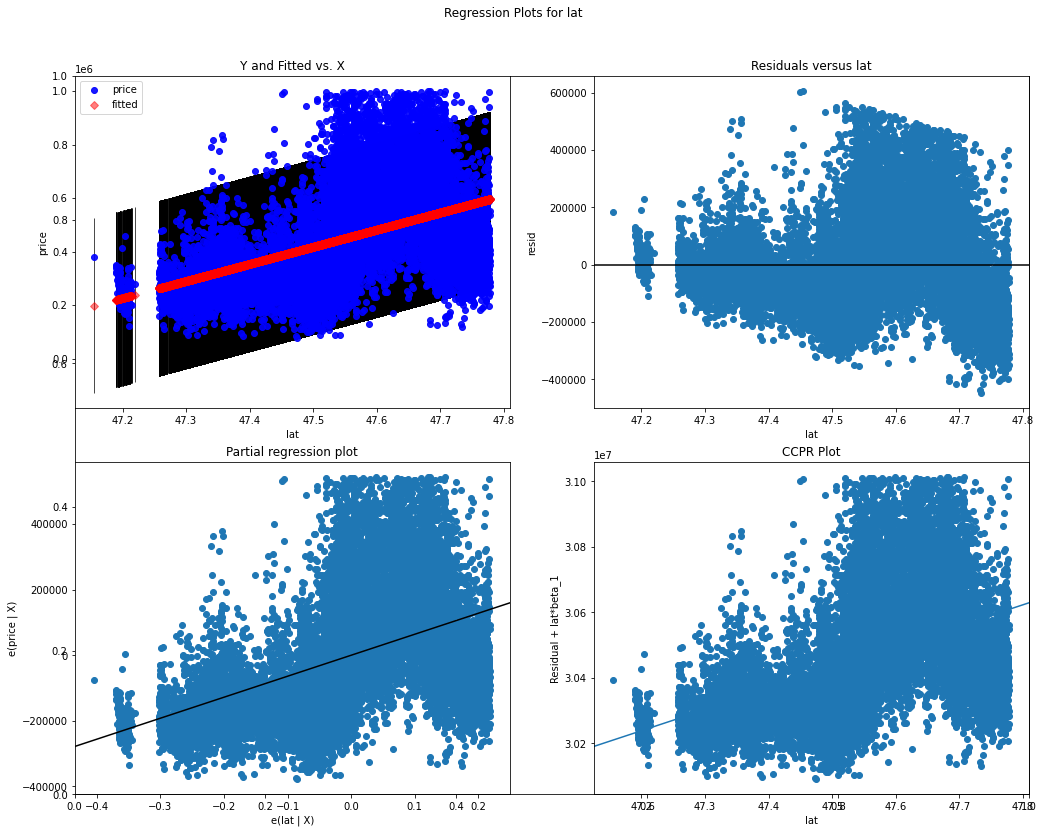

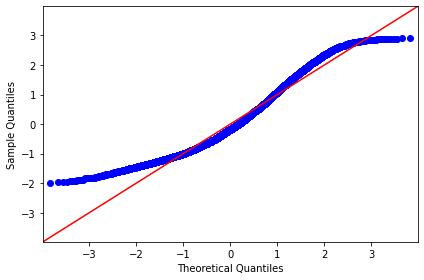

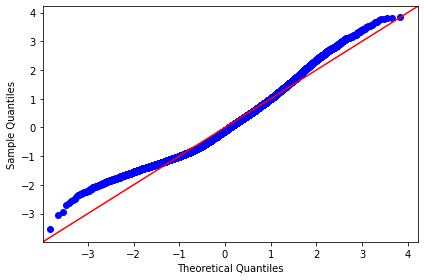

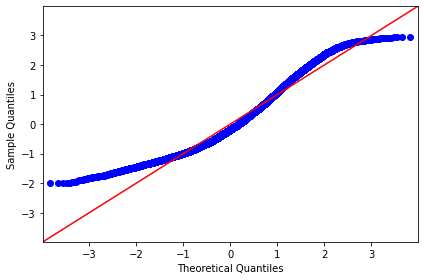

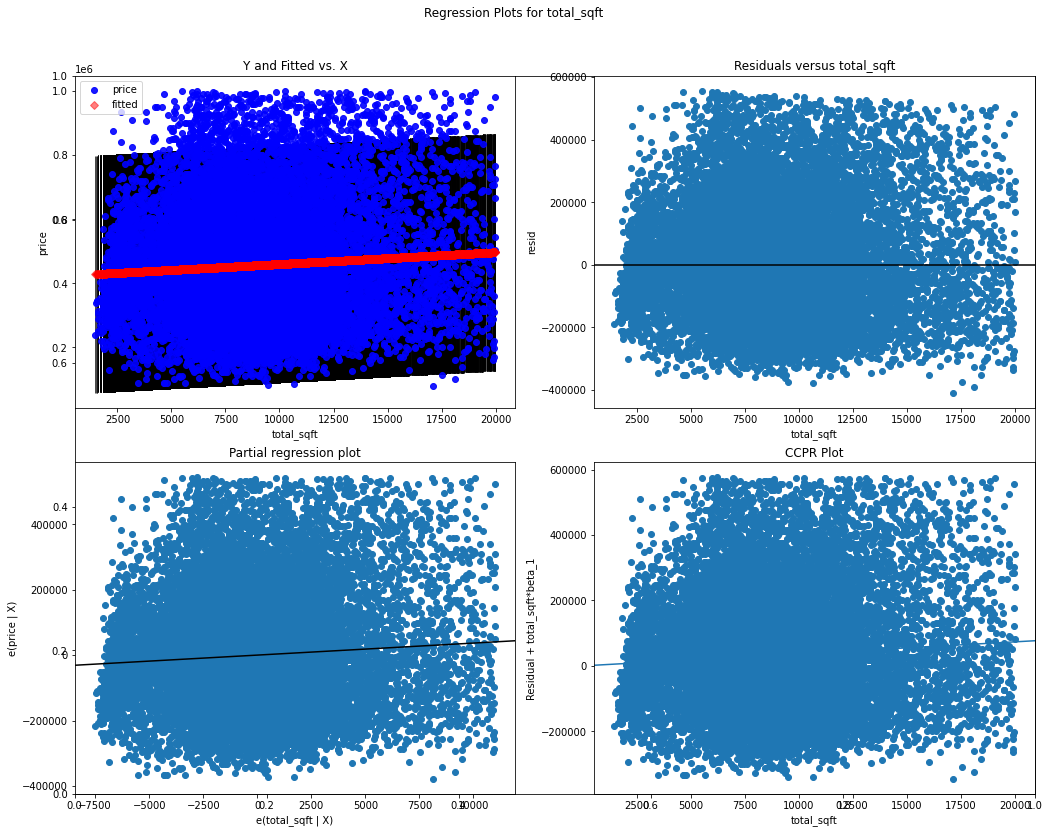

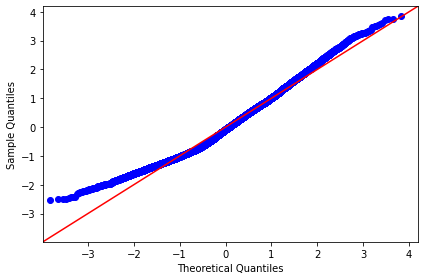

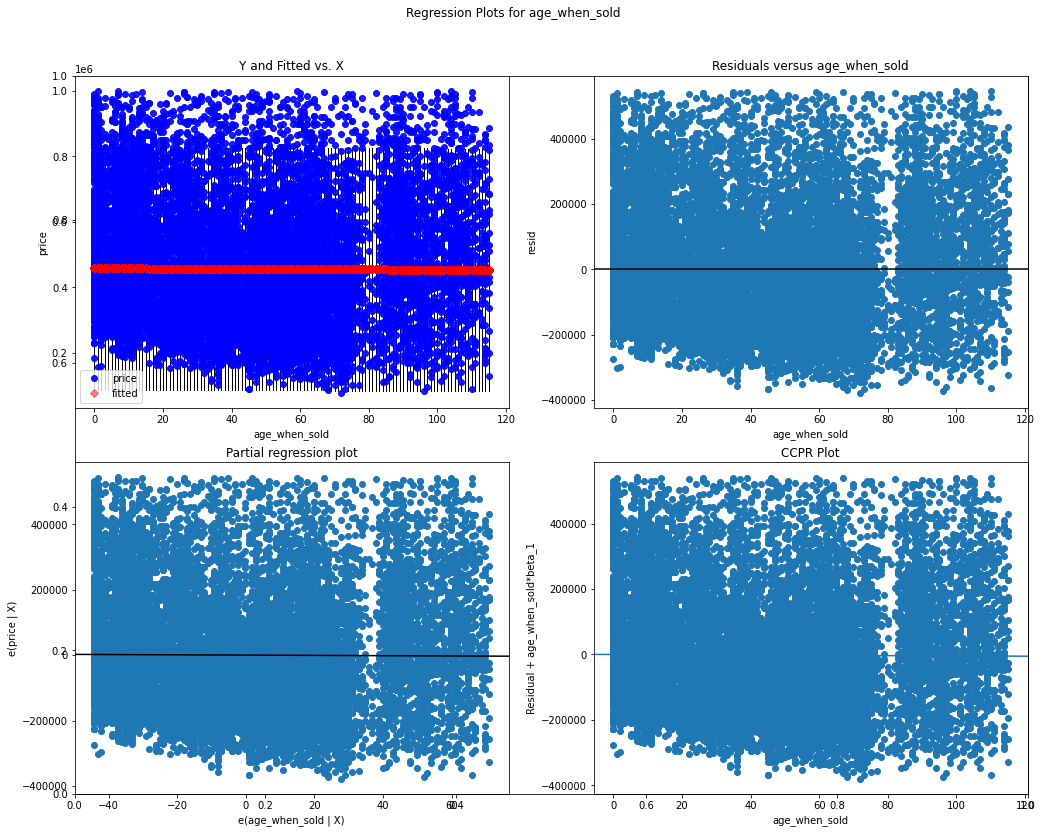

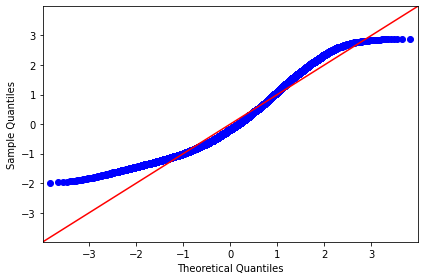

In [200]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms


results = []
for idx, column in enumerate(model_1_data.columns):

    f = f'price~{column}'
    model = smf.ols(formula=f, data=model_1_data).fit()
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], 
                    sms.jarque_bera(model.resid)[0]])

In [201]:
pd.DataFrame(results, columns=['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ])

ind_var  r_squared       intercept        slope  p-value  \
0               price    1.00000         0.00000      1.00000  0.00000   
1            bedrooms    0.07361    258672.24705  59994.38927  0.00000   
2           bathrooms    0.15354    236474.39932 109433.44198  0.00000   
3         sqft_living    0.31995    159785.97177    158.32710  0.00000   
4            sqft_lot    0.00161    472274.15357     -2.25567  0.00000   
5              floors    0.06197    328886.17853  86574.80786  0.00000   
6          sqft_above    0.21061    239241.08820    133.87781  0.00000   
7                 lat    0.22193 -30013055.15830 640657.20155  0.00000   
8                long    0.00091   5702463.21282  42921.41849  0.00017   
9       sqft_living15    0.25374    137897.65627    172.91120  0.00000   
10         sqft_lot15    0.00211    476000.29946     -2.81671  0.00000   
11         total_sqft    0.00480    423278.53008      3.67644  0.00000   
12  total_sqft_inside    0.31618    162607.98425    157.26491  0.00000   
13      age_when_sold    0.00005    458193.53548    -43.77396  0.38943   

    normality (JB)  
0       1158.52206  
1       1014.11854  
2       1056.29646  
3        596.28521  
4       1240.08912  
5       1199.18215  
6        870.69562  
7       1370.19571  
8       1197.06329  
9        986.67114  
10      1250.15674  
11      1106.08159  
12       605.03144  
13      1200.20393

# 9. Remove Multicollinearity

Multicollinearity exists whenever an independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation. Multicollinearity is a problem because it undermines the statistical significance of an independent variable.

Below we take a look at the independent variables to see if there are high correlation between each independent variable. We produced a list of variable pairs and their correlation above 0.70. If a feature is seen to be multicollinear with several other features, we removed that feature.

In [202]:
# concat the log/normalized continuous data with the dummy data
model_1_data = pd.concat([data,dummy_data],axis=1).dropna()
model_1_data.head()

price  bedrooms  bathrooms  sqft_living   sqft_lot  floors  \
0 538000.00000   3.00000    2.25000   2570.00000 7242.00000 2.00000   
1 571000.00000   4.00000    2.00000   2750.00000 7807.00000 1.50000   
2 315000.00000   3.00000    1.00000    960.00000 6634.00000 1.00000   
3 382500.00000   2.00000    1.00000   1190.00000 4440.00000 1.00000   
4 425000.00000   3.00000    1.75000   2500.00000 6840.00000 1.00000   

   sqft_above      lat       long  sqft_living15  sqft_lot15  total_sqft  \
0  2170.00000 47.72100 -122.31900     1690.00000  7639.00000  9812.00000   
1  2250.00000 47.71680 -122.28700     1510.00000  7807.00000 10557.00000   
2   960.00000 47.72640 -122.31000     1570.00000  7203.00000  7594.00000   
3  1190.00000 47.71350 -122.28700     1060.00000  5715.00000  5630.00000   
4  1300.00000 47.72220 -122.32000     1580.00000  8691.00000  9340.00000   

   total_sqft_inside  age_when_sold  waterfront_1  view_1  view_2  view_3  \
0         2570.00000       63.00000             0       0       0       0   
1         2750.00000       98.00000             0       0       0       0   
2          960.00000       62.00000             0       0       0       0   
3         1190.00000       33.00000             0       0       0       0   
4         2500.00000       57.00000             0       0       0       0   

   view_4  condition_2  condition_3  condition_4  condition_5  quarter_sold_2  \
0       0            0            1            0            0               0   
1       0            0            0            0            1               1   
2       0            0            1            0            0               1   
3       0            0            1            0            0               0   
4       0            0            1            0            0               0   

   quarter_sold_3  quarter_sold_4  decade_built_1910  decade_built_1920  \
0               0               1                  0                  0   
1               0               0                  1                  0   
2               0               0                  0                  0   
3               1               0                  0                  0   
4               1               0                  0                  0   

   decade_built_1930  decade_built_1940  decade_built_1950  decade_built_1960  \
0                  0                  0                  1                  0   
1                  0                  0                  0                  0   
2                  0                  0                  1                  0   
3                  0                  0                  0                  0   
4                  0                  0                  1                  0   

   decade_built_1970  decade_built_1980  decade_built_1990  decade_built_2000  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  1                  0                  0   
4                  0                  0                  0                  0   

   decade_built_2010  grade_binned_Fair  grade_binned_Good  grade_binned_High  \
0                  0                  1                  0                  0   
1                  0                  1                  0                  0   
2                  0                  1                  0                  0   
3                  0                  1                  0                  0   
4                  0                  1                  0                  0   

   renovated_1  basement_1  city_Bellevue  city_BlackDiamond  city_Bothell  \
0            1           1              0                  0             0   
1            0           1              0                  0             0   
2            0           0   

If the feature variables are correlated with other predictors, then it would show a red box at the intersection which need to be removed from the model.

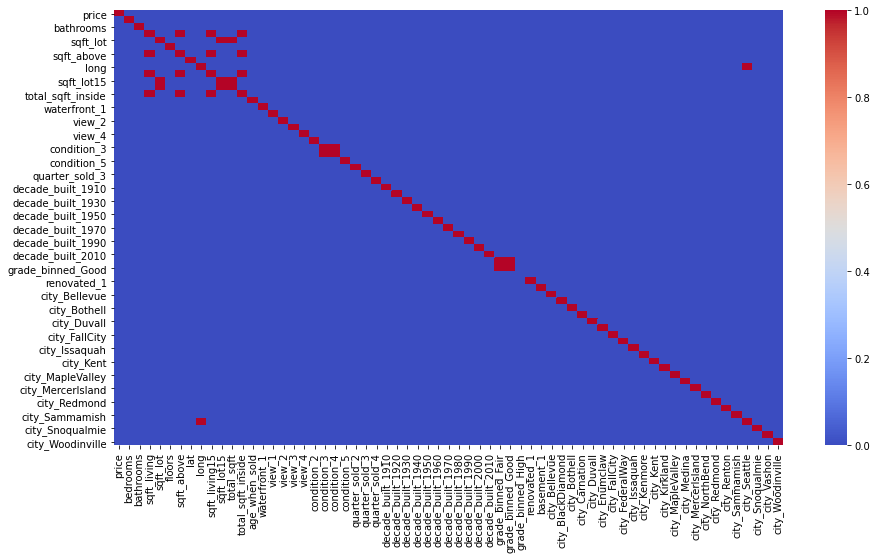

In [203]:
plt.figure(figsize = (15, 8))
sns.heatmap(abs(model_1_data.corr())> 0.70, cmap = 'coolwarm');

In [204]:
# This outputs the top highest correlated pairs
df_pairs = model_1_data.corr().abs().stack().reset_index().sort_values(0, ascending = False)
df_pairs['pairs'] = list(zip(df_pairs.level_0, df_pairs.level_1))
df_pairs.set_index(['pairs'], inplace = True)
df_pairs.drop(columns = ['level_1', 'level_0'], inplace = True)
df_pairs.columns = ['correlation']
df_pairs.drop_duplicates(inplace = True)

In [205]:
# Output the top correlated pairs
df_pairs[(df_pairs.correlation >.70) & (df_pairs.correlation <1)]

correlation
pairs                                              
(sqft_living, total_sqft_inside)            0.99521
(total_sqft, sqft_lot)                      0.98262
(grade_binned_Good, grade_binned_Fair)      0.95268
(sqft_lot, sqft_lot15)                      0.87347
(sqft_lot15, total_sqft)                    0.86002
(total_sqft_inside, sqft_above)             0.83679
(sqft_living, sqft_above)                   0.83461
(condition_3, condition_4)                  0.81617
(sqft_living, sqft_living15)                0.72979
(sqft_living15, total_sqft_inside)          0.72866
(long, city_Seattle)                        0.72751
(sqft_above, sqft_living15)                 0.70835

In [206]:
model_1_data.drop(['total_sqft_inside','total_sqft','sqft_lot15','sqft_living','condition_3','city_Seattle','sqft_living15','grade_binned_Fair'], axis = 1, inplace = True)
model_1_data.head()

price  bedrooms  bathrooms   sqft_lot  floors  sqft_above      lat  \
0 538000.00000   3.00000    2.25000 7242.00000 2.00000  2170.00000 47.72100   
1 571000.00000   4.00000    2.00000 7807.00000 1.50000  2250.00000 47.71680   
2 315000.00000   3.00000    1.00000 6634.00000 1.00000   960.00000 47.72640   
3 382500.00000   2.00000    1.00000 4440.00000 1.00000  1190.00000 47.71350   
4 425000.00000   3.00000    1.75000 6840.00000 1.00000  1300.00000 47.72220   

        long  age_when_sold  waterfront_1  view_1  view_2  view_3  view_4  \
0 -122.31900       63.00000             0       0       0       0       0   
1 -122.28700       98.00000             0       0       0       0       0   
2 -122.31000       62.00000             0       0       0       0       0   
3 -122.28700       33.00000             0       0       0       0       0   
4 -122.32000       57.00000             0       0       0       0       0   

   condition_2  condition_4  condition_5  quarter_sold_2  quarter_sold_3  \
0            0            0            0               0               0   
1            0            0            1               1               0   
2            0            0            0               1               0   
3            0            0            0               0               1   
4            0            0            0               0               1   

   quarter_sold_4  decade_built_1910  decade_built_1920  decade_built_1930  \
0               1                  0                  0                  0   
1               0                  1                  0                  0   
2               0                  0                  0                  0   
3               0                  0                  0                  0   
4               0                  0                  0                  0   

   decade_built_1940  decade_built_1950  decade_built_1960  decade_built_1970  \
0                  0                  1                  0                  0   
1                  0                  0                  0                  0   
2                  0                  1                  0                  0   
3                  0                  0                  0                  0   
4                  0                  1                  0                  0   

   decade_built_1980  decade_built_1990  decade_built_2000  decade_built_2010  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  1                  0                  0                  0   
4                  0                  0                  0                  0   

   grade_binned_Good  grade_binned_High  renovated_1  basement_1  \
0                  0                  0            1           1   
1                  0                  0            0           1   
2                  0                  0            0           0   
3                  0                  0            0           0   
4                  0                  0            0           1   

   city_Bellevue  city_BlackDiamond  city_Bothell  city_Carnation  \
0              0                  0             0               0   
1              0                  0             0               0   
2              0                  0             0               0   
3              0                  0             0               0   
4              0                  0             0               0   

   city_Duvall  city_Enumclaw  city_FallCity  city_FederalWay  city_Issaquah  \
0            0              0              0                0              0   
1            0              0              0                0              0   
2            0              0              0                0              0   
3            0             

In [207]:
# This outputs the top highest correlated pairs
df_pairs = model_1_data.corr().abs().stack().reset_index().sort_values(0, ascending = False)
df_pairs['pairs'] = list(zip(df_pairs.level_0, df_pairs.level_1))
df_pairs.set_index(['pairs'], inplace = True)
df_pairs.drop(columns = ['level_1', 'level_0'], inplace = True)
df_pairs.columns = ['correlation']
df_pairs.drop_duplicates(inplace = True)

In [208]:
# Output the top correlated pairs
df_pairs[(df_pairs.correlation >.70) & (df_pairs.correlation <1)]

Empty DataFrame
Columns: [correlation]
Index: []

In [209]:
plt.figure(figsize = (15, 8))
sns.heatmap(abs(model_1_data.corr())> 0.70, cmap = 'coolwarm');

All the red boxes are gone which means there are no more multicollinearity among the predictor variables.

# 7. Train Test Split

We want to predict the outcome for observations that are not necessarily in our dataset now. The reason for building the model is because we want to predict the outocome for observations that are not in our dataset now.

Train Test Split splits our data randomly to both train the model and test the model.

In [210]:
model_1_data.shape

(15491, 57)

In [211]:
# splits the data into training data and testing data
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(model_1_data)

x_train_data = train_data.drop(['price'],axis=1)
y_train_data = train_data['price']

x_test_data = test_data.drop(['price'],axis=1)
y_test_data = test_data['price']

print('Training Data')
print('-------------')
print(f'x_train: {len(x_train_data)}')
print(f'y_train: {len(y_train_data)}')
print('\n')
print('Testing Data')
print('-------------')
print(f'x_test: {len(x_test_data)}')
print(f'y_test: {len(y_test_data)}')

Training Data
-------------
x_train: 11618
y_train: 11618


Testing Data
-------------
x_test: 3873
y_test: 3873


# 8. Training the Model



In [212]:
# outcome is target
outcome = 'price'
# x_cols are the predictors
x_cols = list(train_data.drop(['price'],axis=1).columns)

# testing regression model with current train data
pred_sum = '+'.join(x_cols)
formula = outcome + '~' + pred_sum

model_1_results = ols(formula=formula, data=train_data).fit()
model_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     571.8
Date:                Sat, 01 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:30:23   Log-Likelihood:            -1.4997e+05
No. Observations:               11618   AIC:                         3.000e+05
Df Residuals:                   11562   BIC:                         3.005e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6.623e+07   2.64e+06    -25.053      0.000   -7.14e+07   -6.11e+07
bedrooms          -4007.7431   1415.092     -2.832      0.005   -6781.563   -1233.923
bathrooms          2.531e+04   2330.478     10.859      0.000    2.07e+04    2.99e+04
sqft_lot             -2.8525      0.393     -7.266      0.000      -3.622      -2.083
floors             -590.6516   2889.758     -0.204      0.838   -6255.067    5073.764
sqft_above          135.1646      2.717     49.739      0.000     129.838     140.491
lat                 5.27e+05   1.13e+04     46.590      0.000    5.05e+05    5.49e+05
long              -3.371e+05   2.26e+04    -14.925      0.000   -3.81e+05   -2.93e+05
age_when_sold      1688.7255    325.415      5.189      0.000    1050.857    2326.594
waterfront_1       2.204e+05   3.15e+04      6.987      0.000    1.59e+05    2.82e+05
view_1               8.8e+04   8199.681     10.732      0.000    7.19e+04    1.04e+05
view_2             8.554e+04   5184.465     16.500      0.000    7.54e+04    9.57e+04
view_3             1.157e+05   8535.013     13.550      0.000    9.89e+04    1.32e+05
view_4             2.062e+05    1.6e+04     12.875      0.000    1.75e+05    2.38e+05
condition_2       -4.311e+04   1.11e+04     -3.883      0.000   -6.49e+04   -2.13e+04
condition_4        2.366e+04   2388.910      9.903      0.000     1.9e+04    2.83e+04
condition_5        5.782e+04   3728.446     15.509      0.000    5.05e+04    6.51e+04
quarter_sold_2     4134.3193   2646.458      1.562      0.118   -1053.186    9321.825
quarter_sold_3    -9010.6252   2728.513     -3.302      0.001   -1.44e+04   -3662.278
quarter_sold_4    -1.459e+04   2864.741     -5.093      0.000   -2.02e+04   -8975.659
decade_built_1910    90.5742   7493.961      0.012      0.990   -1.46e+04    1.48e+04
decade_built_1920  2.991e+04   9002.374      3.322      0.001    1.23e+04    4.76e+04
decade_built_1930  1681.2271   1.25e+04      0.135      0.893   -2.27e+04    2.61e+04
decade_built_1940 -1.093e+04   1.43e+04     -0.765      0.444   -3.89e+04    1.71e+04
decade_built_1950 -9578.7736   1.72e+04     -0.555      0.579   -4.34e+04    2.42e+04
decade_built_1960 -2862.0115   2.04e+04     -0.140      0.888   -4.28e+04    3.71e+04
decade_built_1970  1.376e+04   2.37e+04      0.580      0.562   -3.28e+04    6.03e+04
decade_built_1980   4.05e+04   2.66e+04      1.524      0.128   -1.16e+04    9.26e+04
decade_built_1990  5.828e+04   2.95e+04      1.973      0.049     369.446    1.16e+05
decade_built_2000  5.658e+04   3.27e+04      1.732      0.083   -7466.467    1.21e+05
decade_built_2010  1.077e+05   3.53e+04      3.048      0.002    3.84e+04    1.77e+05
grade_binned_Good  9.211e+04   3524.776     26.132      0.000    8.52e+04     9.9e+04
grade_binned_High -3.141e-08   2.04e-08     -1.536      0.125   -7.15e-08

# 11. Remove the Uninfluential Features

If a feature has a statistically significant relationship with price, the p-value will be less than 0.05. The null hypothesis that the coefficient = 0 is true. For features that have high p-values, we need to remove them from the model since they have no relationship with price.

In [213]:
# remove uninfluential features 
summary = model_1_results.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table),'-->' ,len(x_cols))

57 --> 42


# 12. Final Model

In [214]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model_1_results = ols(formula=formula, data=train_data).fit()
model_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     737.0
Date:                Sat, 01 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:30:23   Log-Likelihood:            -1.5004e+05
No. Observations:               11618   AIC:                         3.002e+05
Df Residuals:                   11575   BIC:                         3.005e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6.422e+07   2.09e+06    -30.676      0.000   -6.83e+07   -6.01e+07
bedrooms          -6723.4510   1393.312     -4.826      0.000   -9454.578   -3992.324
bathrooms            3.2e+04   2240.412     14.283      0.000    2.76e+04    3.64e+04
sqft_lot             -4.4784      0.333    -13.435      0.000      -5.132      -3.825
sqft_above          139.6019      2.588     53.943      0.000     134.529     144.675
lat                5.153e+05   1.02e+04     50.570      0.000    4.95e+05    5.35e+05
long              -3.256e+05   1.82e+04    -17.882      0.000   -3.61e+05    -2.9e+05
age_when_sold      1117.4034     51.632     21.642      0.000    1016.195    1218.611
waterfront_1       2.238e+05   3.17e+04      7.064      0.000    1.62e+05    2.86e+05
view_1             8.494e+04   8226.576     10.325      0.000    6.88e+04    1.01e+05
view_2             8.269e+04   5205.727     15.885      0.000    7.25e+04    9.29e+04
view_3             1.129e+05   8573.937     13.167      0.000    9.61e+04     1.3e+05
view_4             2.036e+05   1.61e+04     12.662      0.000    1.72e+05    2.35e+05
condition_2       -4.294e+04   1.12e+04     -3.849      0.000   -6.48e+04   -2.11e+04
condition_4         2.02e+04   2356.917      8.571      0.000    1.56e+04    2.48e+04
condition_5        5.383e+04   3722.506     14.462      0.000    4.65e+04    6.11e+04
quarter_sold_3    -1.217e+04   2168.823     -5.609      0.000   -1.64e+04   -7913.855
quarter_sold_4    -1.813e+04   2341.680     -7.744      0.000   -2.27e+04   -1.35e+04
decade_built_1920  4.068e+04   4259.530      9.551      0.000    3.23e+04     4.9e+04
decade_built_1990  1.845e+04   3496.714      5.278      0.000    1.16e+04    2.53e+04
decade_built_2010  5.082e+04   4293.770     11.836      0.000    4.24e+04    5.92e+04
grade_binned_Good  9.504e+04   3528.538     26.934      0.000    8.81e+04    1.02e+05
renovated_1         3.04e+04   5794.415      5.246      0.000     1.9e+04    4.18e+04
basement_1         7.615e+04   2405.307     31.661      0.000    7.14e+04    8.09e+04
city_Bellevue      2.027e+05   5105.702     39.710      0.000    1.93e+05    2.13e+05
city_BlackDiamond   1.42e+05   1.96e+04      7.256      0.000    1.04e+05     1.8e+05
city_Bothell      -5.587e+04   9629.159     -5.802      0.000   -7.47e+04    -3.7e+04
city_Carnation     5.819e+04   2.15e+04      2.706      0.007     1.6e+04       1e+05
city_Duvall       -2.517e+04   1.29e+04     -1.956      0.050   -5.04e+04      51.163
city_Enumclaw      1.237e+05   1.15e+04     10.712      0.000    1.01e+05    1.46e+05
city_FallCity      1.076e+05   2.57e+04      4.186      0.000    5.72e+04    1.58e+05
city_FederalWay   -2.976e+04   5615.343     -5.299      0.000   -4.08e+04   -1.87e+04
city_Issaquah      1.726e+05   7195.108     23.987      0.000    1.58e+05

## Interpretation

After removing multicollinearity among the independent variables and removing statistically insignificant features, the r-squared decreased - this is expected since when features are added r-squared goes up.

* R-squared is 0.733, showing that our data is closely fitted to our regression line.
* F-statistic p-value is 0.00, probability that our sample would represent the population, holds true
* There are no more statistically insignificant p-values between the coefficient and predictor. There are a few that are close but can still consider all coefficients to be statistically significant.
* Skewness is 0.519, meaning the data is borderline skewed, but still symmetric
* Kurtosis is not 3 (normal) and is higher than 3, meaning the tails are heavy

# 13. Check the Normality Assumption

The normality assumption states that the model residuals should follow a normal distribution. For regression, when checking if the data in this sample is normally distributed, we can use a Normal Q-Q plot to test that assumption.

In the context of normality of residuals, Q-Q plots can help you validate the assumption of normally distributed residuals. It uses standardized values of residuals to determine the normal distribution of errors. Ideally, this plot should show a straight line. A curved, distorted line suggests residuals have a non-normal distribution.

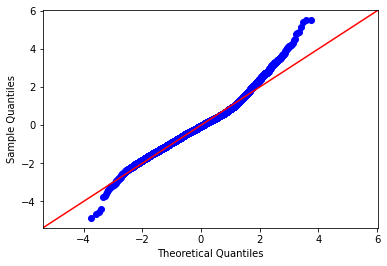

In [215]:
# validate the asssumption of normally distributed residuals
    # should show a straight line
    # a curve,distorted line suggests residuals have a non-normal distribution
import scipy.stats as stats
residuals = model_1_results.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.savefig('images/final_model_normality.png')
fig.show()

The Q-Q plot above is heavily skewed to the right.

# 14. Check Homoscedasticity Assumption

Homoscedasticity refers to the circumstance in which the dependent variable is equal across the range of values of the predictor(s), meaning the residuals are equal across the regression line assuming the error term has mean of 0.

When there is heteroscedasticity in the data, a scatterplot of these variables will often create a cone-like shape. The scatter of the dependent variable widens or narrows as the value of the independent variable increases.

Looks like the data is homoscedasticity :)

In [216]:
plt.figure(figsize=(20,10))
plt.scatter(model_1_results.predict(train_data[x_cols]), model_1_results.resid)
plt.ticklabel_format(useOffset=False, style='plain')
plt.plot(model_1_results.predict(train_data[x_cols]), [0 for i in range(len(train_data))])

plt.savefig('images/final_model_homo.png')

# 15. Evaluate the Model

We want to compare the predicted values, y_hat with the actual value, y. The difference between the two values is referred to as the residuals.

* If test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

In [217]:
# outputs the training and testing data rows
print('Training Data')
print('-------------')
print(f'x_train: {len(x_train_data)}')
print(f'y_train: {len(y_train_data)}')
print('\n')
print('Testing Data')
print('-------------')
print(f'x_test: {len(x_test_data)}')
print(f'y_test: {len(y_test_data)}')

Training Data
-------------
x_train: 11618
y_train: 11618


Testing Data
-------------
x_test: 3873
y_test: 3873


**MAE** (Mean Absolute Error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**MSE** (Mean Squared Error)represents the difference between the original and predicted values extracted by squared the average difference over the data set.

**RMSE** (Root Mean Squared Error) is the error rate by the square root of MSE.

In [218]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train_data,y_train_data)

y_pred_train = lm.predict(x_train_data)
y_pred_test = lm.predict(x_test_data)

# calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train_data, y_pred_train)
mae_test = mean_absolute_error(y_test_data, y_pred_test)
print("MAE Train Set:", mae_train) 
print("MAE Test Set :", mae_test,'\n')

# calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train_data, y_pred_train)
mse_test = mean_squared_error(y_test_data, y_pred_test)
print("MSE Train Set:", mse_train) 
print("MSE Test Set :", mse_test,'\n')

# calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print("RMSE Train Set:", rmse_train)
print("RMSE Test Set:", rmse_test,'\n')

MAE Train Set: 73124.6506649838
MAE Test Set : 74012.14079980213 

MSE Train Set: 9535037219.063795
MSE Test Set : 9810956250.368456 

RMSE Train Set: 97647.51517096478
RMSE Test Set: 99050.27132910064 



All errors are equal between training and test sets. Looks good.

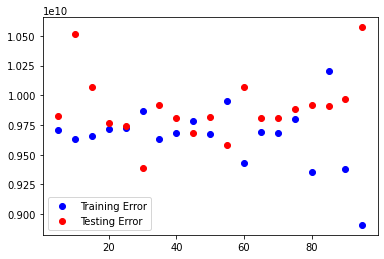

In [219]:
train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(model_1_data[x_cols], model_1_data['price'], test_size=t_size/100)
    lm.fit(X_train, y_train)
    y_hat_train = lm.predict(X_train)
    y_hat_test = lm.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error', color = 'blue')
plt.scatter(t_sizes, test_err, label='Testing Error', color = 'red')
plt.legend()

# 16. K-Fold Cross Validation

Because random samples of data are created for the training and the test set, the MSE depends on how the training and test sets were created.

K-fold cross validation splits the entire dataset into 'K' equal sections of data. We'll then interatively train {K} linear regression models on the data, with each linear model using a different section of data as the test set, and all other sections combined as the training set. We then average the results to get a Cross-Validation MSE.

We can then average the individual results from each of these linear models to get a cross-validation MSE.

In [220]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(lm, x_train_data, y_train_data, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(lm, x_train_data, y_train_data, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(lm, x_train_data, y_train_data, cv=20, scoring='neg_mean_squared_error'))

print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-9642577672.170483
-9632792500.29132
-9628890569.28683


The cross validation for different iterations result have the same results. This tells us that our model is not underfitted or overfitted.

(array([  8.,  23.,  50., 156., 292., 157.,  72.,  14.,   1.,   1.]),
 array([-330208.26213194, -256561.90343673, -182915.54474151,
        -109269.1860463 ,  -35622.82735108,   38023.53134413,
         111669.89003935,  185316.24873456,  258962.60742978,
         332608.96612499,  406255.32482021]),
 <a list of 10 Patch objects>)

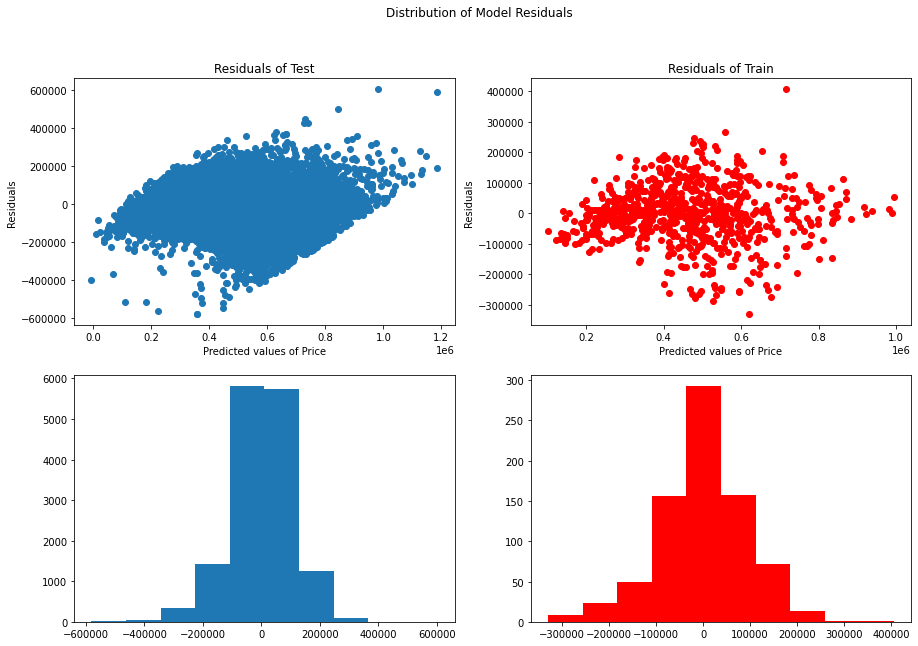

In [221]:
residuals_train = y_hat_train - y_train
residuals_test = y_hat_test - y_test

fig = plt.figure(figsize=(15,10))
fig.suptitle("Distribution of Model Residuals")

ax1 = fig.add_subplot(2,2,1) #Scatterplot of test residuals
ax1.scatter(x=y_hat_test, y=residuals_test)
ax1.set_title('Residuals of Test')
ax1.set_xlabel('Predicted values of Price')
ax1.set_ylabel('Residuals')

ax2 = fig.add_subplot(2,2,2) #Scatterplot of train residuals
ax2.scatter(x=y_hat_train, y=residuals_train, c='red')
ax2.set_title('Residuals of Train')
ax2.set_xlabel('Predicted values of Price')
ax2.set_ylabel('Residuals')

ax3 = fig.add_subplot(2,2,3) #Histogram of test residuals
ax3.hist(residuals_test) 

ax4 = fig.add_subplot(2,2,4) #Histogram of train residuals
ax4.hist(residuals_train, color='red')

These both appear to be relatively normal and homoscedasticity. Great!

# Multiple Regression Formula 
## 𝑦̂ =𝛽̂0+𝛽̂1𝑥1+𝛽̂2𝑥2+…+𝛽̂ 𝑛𝑥𝑛
* 𝑦̂: best "fitted line" or the predicted value associated with the predictor variables
* 𝛽̂0: y-intercept
* 𝛽̂n: coefficients of each selected predictor variable
* 𝑥n: predictor variable
* n: number of predictor variables

In [222]:
# model coefficients
model_1_results.params

Intercept           -64223783.69114
bedrooms                -6723.45105
bathrooms               31998.75134
sqft_lot                   -4.47837
sqft_above                139.60188
lat                    515320.30968
long                  -325563.96504
age_when_sold            1117.40343
waterfront_1           223845.33470
view_1                  84941.10142
view_2                  82693.03234
view_3                 112890.06251
view_4                 203583.00196
condition_2            -42942.31930
condition_4             20200.97211
condition_5             53834.16863
quarter_sold_3         -12165.11397
quarter_sold_4         -18134.94166
decade_built_1920       40682.95843
decade_built_1990       18454.11636
decade_built_2010       50819.48499
grade_binned_Good       95037.50755
renovated_1             30395.34404
basement_1              76153.36523
city_Bellevue          202748.81844
city_BlackDiamond      141973.80744
city_Bothell           -55869.81689
city_Carnation          5818

In [227]:
# these are the predicted values of the model which plotted is our best fit line
yhat = lm.predict(model_1_data[x_cols])
yhat

array([668119.62702209, 705853.28866723, 405182.42200036, ...,
       358548.59662989, 369807.81909508, 367172.60598965])

Final R-Squared Value: 0.7054097196787071


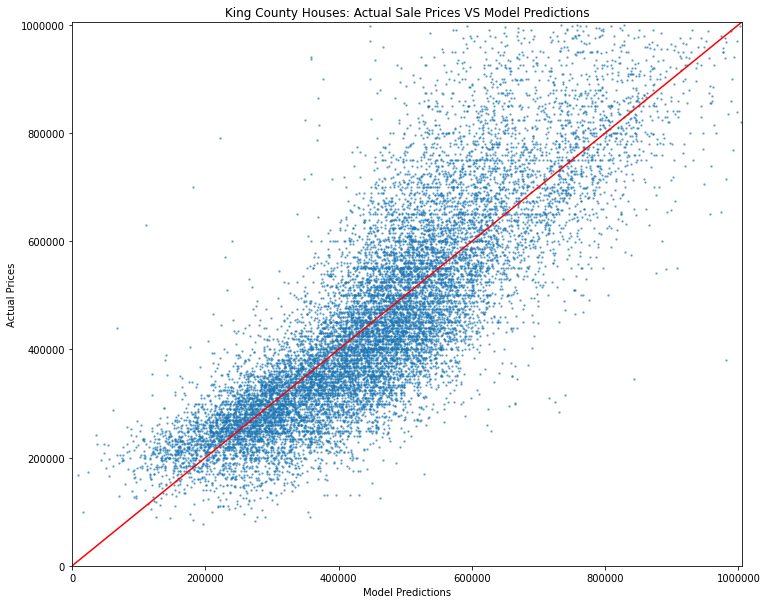

In [237]:
plt.figure(figsize = (12,10))
print('Final R-Squared Value: {}'.format(lm.score(x_test_data[x_cols], y_test_data)))
# Plot the actual and predicted values
plt.scatter(yhat, model_1_data['price'], s=2, alpha = 0.5)
plt.ticklabel_format(useOffset=False, style='plain')
plt.plot([0,1005000], [0,1005000], color='red')

# Set ranges for values
plt.xlim(0,1005000)
plt.ylim(0,1005000)

plt.title('King County Houses: Actual Sale Prices VS Model Predictions')
plt.xlabel('Model Predictions')
plt.ylabel('Actual Prices');